## Data driven prediction models of energy use of appliances in a low-energy house


Authors : Lampropoulos Sofianos 

## Importing Libraries

In [1]:
## We import the apropriate libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Data insertion
energy_data = pd.read_csv(r'C:\Users\mitsukobass\Downloads\Material for Project 2 - Energy Prediction\energydata_complete.csv')


In [184]:
energy_data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

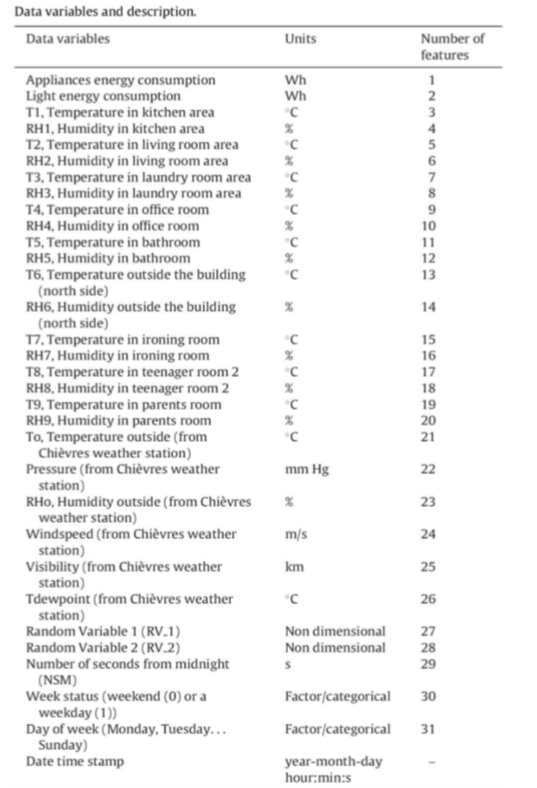

In [185]:
energy_data.size


572315

In [186]:
#check dataframe for null and datatype 
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [187]:

#check the details of numerical data
energy_data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [188]:
#check the columns of data
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [189]:
#check the datatypes of data
energy_data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [190]:
#check the axes of data
energy_data.axes


[RangeIndex(start=0, stop=19735, step=1),
 Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
        'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
        'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
        'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
       dtype='object')]

In [191]:
#check the dimensions of data
energy_data.ndim

2

In [192]:
#check the values of data
energy_data.values

array([['2016-01-11 17:00:00', 60, 30, ..., 5.3, 13.275433157104999,
        13.275433157104999],
       ['2016-01-11 17:10:00', 60, 30, ..., 5.2, 18.606194981839508,
        18.606194981839508],
       ['2016-01-11 17:20:00', 50, 30, ..., 5.1, 28.64266816759482,
        28.64266816759482],
       ...,
       ['2016-05-27 17:40:00', 270, 10, ..., 13.2666666666667,
        29.19911708449945, 29.19911708449945],
       ['2016-05-27 17:50:00', 420, 10, ..., 13.2333333333333,
        6.322783650830388, 6.322783650830388],
       ['2016-05-27 18:00:00', 430, 10, ..., 13.2, 34.11885058740154,
        34.11885058740154]], dtype=object)

There are **19735** rows/entries of data and **29** columns in the data set

## Energy Data Cleaning

In [193]:
energy_data.corr()

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.197278  0.055447  0.086031  0.120073 -0.060465   
lights         0.197278  1.000000 -0.023528  0.106968 -0.005622  0.050985   
T1             0.055447 -0.023528  1.000000  0.164006  0.836834 -0.002509   
RH_1           0.086031  0.106968  0.164006  1.000000  0.269839  0.797535   
T2             0.120073 -0.005622  0.836834  0.269839  1.000000 -0.165610   
RH_2          -0.060465  0.050985 -0.002509  0.797535 -0.165610  1.000000   
T3             0.085060 -0.097393  0.892402  0.253230  0.735245  0.137319   
RH_3           0.036292  0.131161 -0.028550  0.844677  0.121497  0.678326   
T4             0.040281 -0.008859  0.877001  0.106180  0.762066 -0.047304   
RH_4           0.016965  0.114936  0.097861  0.880359  0.231563  0.721435   
T5             0.019760 -0.078745  0.885247  0.205797  0.720550  0.110409   
RH_5           0.006955  0.141233 -0.014782  0.303258  0.029595  0.250271   
T6             0.117638 -0.079029  0.654769  0.316141  0.801186 -0.009670   
RH_6          -0.083178  0.153756 -0.615045  0.245126 -0.580372  0.389933   
T7             0.025801 -0.135347  0.838705  0.021397  0.663660 -0.051422   
RH_7          -0.055642  0.035069  0.135182  0.801122  0.229212  0.690584   
T8             0.039572 -0.071458  0.825413 -0.030053  0.578191 -0.041023   
RH_8          -0.094039  0.012915 -0.006441  0.736196  0.068534  0.679777   
T9             0.010010 -0.157592  0.844777  0.115263  0.675535  0.054544   
RH_9          -0.051462 -0.008766  0.071756  0.764001  0.157346  0.676467   
T_out          0.099155 -0.074424  0.682846  0.340767  0.792255  0.033674   
Press_mm_hg   -0.034885 -0.010576 -0.150574 -0.293957 -0.133028 -0.255646   
RH_out        -0.152282  0.068543 -0.345481  0.274126 -0.505291  0.584911   
Windspeed      0.087122  0.060281 -0.087654  0.204932  0.052495  0.069190   
Visibility     0.000230  0.020038 -0.076210 -0.021057 -0.069721 -0.005368   
Tdewpoint      0.015353 -0.036322  0.571309  0.639106  0.582602  0.499152   
rv1           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   
rv2           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   

                   T3      RH_3        T4      RH_4  ...        T9      RH_9  \
Appliances   0.085060  0.036292  0.040281  0.016965  ...  0.010010 -0.051462   
lights      -0.097393  0.131161 -0.008859  0.114936  ... -0.157592 -0.008766   
T1           0.892402 -0.028550  0.877001  0.097861  ...  0.844777  0.071756   
RH_1         0.253230  0.844677  0.106180  0.880359  ...  0.115263  0.764001   
T2           0.735245  0.121497  0.762066  0.231563  ...  0.675535  0.157346   
RH_2         0.137319  0.678326 -0.047304  0.721435  ...  0.054544  0.676467   
T3           1.000000 -0.011234  0.852778  0.122737  ...  0.901324  0.134602   
RH_3        -0.011234  1.000000 -0.140457  0.898978  ... -0.195270  0.833538   
T4           0.852778 -0.140457  1.000000 -0.048650  ...  0.889439 -0.025549   
RH_4         0.122737  0.898978 -0.048650  1.000000  ... -0.044518  0.856591   
T5           0.888169 -0.050062  0.871813  0.091812  ...  0.911055  0.072308   
RH_5        -0.066355  0.375422 -0.076489  0.352591  ... -0.138509  0.272197   
T6           0.686882  0.076833  0.652350  0.259047  ...  0.667177  0.184424   
RH_6        -0.647672  0.514912 -0.703149  0.392178  ... -0.738940  0.391943   
T7           0.847374 -0.250090  0.877763 -0.131204  ...  0.944776 -0.077690   
RH_7         0.172624  0.832685  0.043527  0.894301  ...  0.028055  0.858686   
T8           0.795283 -0.283228  0.796256 -0.167066  ...  0.869338 -0.156820   
RH_8         0.044427  0.828822 -0.095192  0.847259  ... -0.113014  0.855812   
T9           0.901324 -0.195270  0.889439 -0.044518  ...  1.000000 -0.008683   
RH_9         0.134602  0.833538 -0.025549  0.856591  ... -0.008683  1.000000   
T_out        0.699417  0.118207  0.663478  0.293289  ...  0.668220  0.223270   
Press_mm_hg -0.1899

### 3.2 Handle Missing values

As we have seen there are no missing values in our dataset but lets show it again!

In [194]:
#Print null counts by column
energy_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### 3.3 Handle Outliers

In [195]:
energy_data.nunique() # We demonstrate the unique values

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

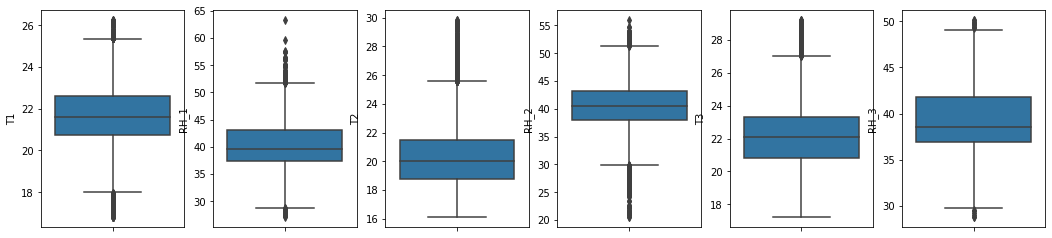

In [196]:
# Draw box plots for some indepent variables(Temperatures and Humidities) with continuous values
cols = ['T1','RH_1','T2','RH_2','T3','RH_3']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,6,i)
    sns.boxplot(y=col, data=energy_data)
    i+=1

#### From these plots, we can see there are no outliers to be handled.

# PCA

Converting the "object" types into "numerous" in order to perform standardizing.

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in energy_data.columns:
    if energy_data[column].dtypes == "object":
        energy_data[column] = le.fit_transform(energy_data[column])
        

In [198]:
energy_data.set_index('date')

Appliances  lights         T1       RH_1         T2       RH_2  \
date                                                                    
0              60      30  19.890000  47.596667  19.200000  44.790000   
1              60      30  19.890000  46.693333  19.200000  44.722500   
2              50      30  19.890000  46.300000  19.200000  44.626667   
3              50      40  19.890000  46.066667  19.200000  44.590000   
4              60      40  19.890000  46.333333  19.200000  44.530000   
...           ...     ...        ...        ...        ...        ...   
19730         100       0  25.566667  46.560000  25.890000  42.025714   
19731          90       0  25.500000  46.500000  25.754000  42.080000   
19732         270      10  25.500000  46.596667  25.628571  42.768571   
19733         420      10  25.500000  46.990000  25.414000  43.036000   
19734         430      10  25.500000  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4  ...         T9     RH_9  \
date                                               ...                       
0      19.790000  44.730000  19.000000  45.566667  ...  17.033333  45.5300   
1      19.790000  44.790000  19.000000  45.992500  ...  17.066667  45.5600   
2      19.790000  44.933333  18.926667  45.890000  ...  17.000000  45.5000   
3      19.790000  45.000000  18.890000  45.723333  ...  17.000000  45.4000   
4      19.790000  45.000000  18.890000  45.530000  ...  17.000000  45.4000   
...          ...        ...        ...        ...  ...        ...      ...   
19730  27.200000  41.163333  24.700000  45.590000  ...  23.200000  46.7900   
19731  27.133333  41.223333  24.700000  45.590000  ...  23.200000  46.7900   
19732  27.050000  41.690000  24.700000  45.730000  ...  23.200000  46.7900   
19733  26.890000  41.290000  24.700000  45.790000  ...  23.200000  46.8175   
19734  26.823333  41.156667  24.700000  45.963333  ...  23.200000  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
date                                                                         
0       6.600000        733.5  92.000000   7.000000   63.000000   5.300000   
1       6.483333        733.6  92.000000   6.666667   59.166667   5.200000   
2       6.366667        733.7  92.000000   6.333333   55.333333   5.100000   
3       6.250000        733.8  92.000000   6.000000   51.500000   5.000000   
4       6.133333        733.9  92.000000   5.666667   47.666667   4.900000   
...          ...          ...        ...        ...         ...        ...   
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
date                         
0      13.275433  13.275433  
1      18.606195  18.606195  
2      28.642668  28.642668  
3      45.410389  45.410389  
4      10.084097  10.084097  
...          ...        ...  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[19735 rows x 28 columns]

In [4]:
X = energy_data.loc[:, energy_data.columns != 'Appliances']
y = energy_data[["Appliances"]]

In [201]:
X.head()

date  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0     0      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1     1      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2     2      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3     3      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4     4      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...         T9   RH_9     T_out  Press_mm_hg  RH_out  \
0  19.000000  45.566667  ...  17.033333  45.53  6.600000        733.5    92.0   
1  19.000000  45.992500  ...  17.066667  45.56  6.483333        733.6    92.0   
2  18.926667  45.890000  ...  17.000000  45.50  6.366667        733.7    92.0   
3  18.890000  45.723333  ...  17.000000  45.40  6.250000        733.8    92.0   
4  18.890000  45.530000  ...  17.000000  45.40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  
2   6.333333   55.333333        5.1  28.642668  28.642668  
3   6.000000   51.500000        5.0  45.410389  45.410389  
4   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 28 columns]

In [202]:
y.head()

Appliances
0          60
1          60
2          50
3          50
4          60

**Standardizing**

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

y_std = StandardScaler().fit_transform(y)

In [6]:
X_std = pd.DataFrame(X_std)
X_std.columns = ['date','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3','T4', 
                 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6','T7', 'RH_7', 'T8', 'RH_8', 
                 'T9','RH_9', 'T_out', 'Press_mm_hg', 'RH_out','Windspeed', 'Visibility', 'Tdewpoint', 'rv1','rv2']
X_std.head()

date    lights        T1      RH_1        T2      RH_2        T3  \
0 -1.731963  3.301264 -1.118645  1.843821 -0.520411  1.073683 -1.235063   
1 -1.731788  3.301264 -1.118645  1.616807 -0.520411  1.057097 -1.235063   
2 -1.731612  3.301264 -1.118645  1.517959 -0.520411  1.033550 -1.235063   
3 -1.731436  4.561378 -1.118645  1.459321 -0.520411  1.024540 -1.235063   
4 -1.731261  4.561378 -1.118645  1.526336 -0.520411  1.009797 -1.235063   

       RH_3        T4      RH_4  ...        T9      RH_9     T_out  \
0  1.686130 -0.908217  1.506438  ... -1.217324  0.958136 -0.152647   
1  1.704566 -0.908217  1.604528  ... -1.200778  0.965363 -0.174588   
2  1.748608 -0.944115  1.580918  ... -1.233869  0.950910 -0.196529   
3  1.769092 -0.962063  1.542526  ... -1.233869  0.926821 -0.218470   
4  1.769092 -0.962063  1.497991  ... -1.233869  0.926821 -0.240411   

   Press_mm_hg   RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0    -2.976328  0.82208   1.207694    2.091596   0.366975 -0.807974 -0.807974  
1    -2.962813  0.82208   1.071703    1.766584   0.343135 -0.440240 -0.440240  
2    -2.949298  0.82208   0.935713    1.441572   0.319294  0.252109  0.252109  
3    -2.935783  0.82208   0.799723    1.116559   0.295454  1.408801  1.408801  
4    -2.922268  0.82208   0.663733    0.791547   0.271613 -1.028122 -1.028122  

[5 rows x 28 columns]

In [7]:
y_std = pd.DataFrame(y_std)
y_std.head()

0
0 -0.367676
1 -0.367676
2 -0.465215
3 -0.465215
4 -0.367676

####  Draw pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

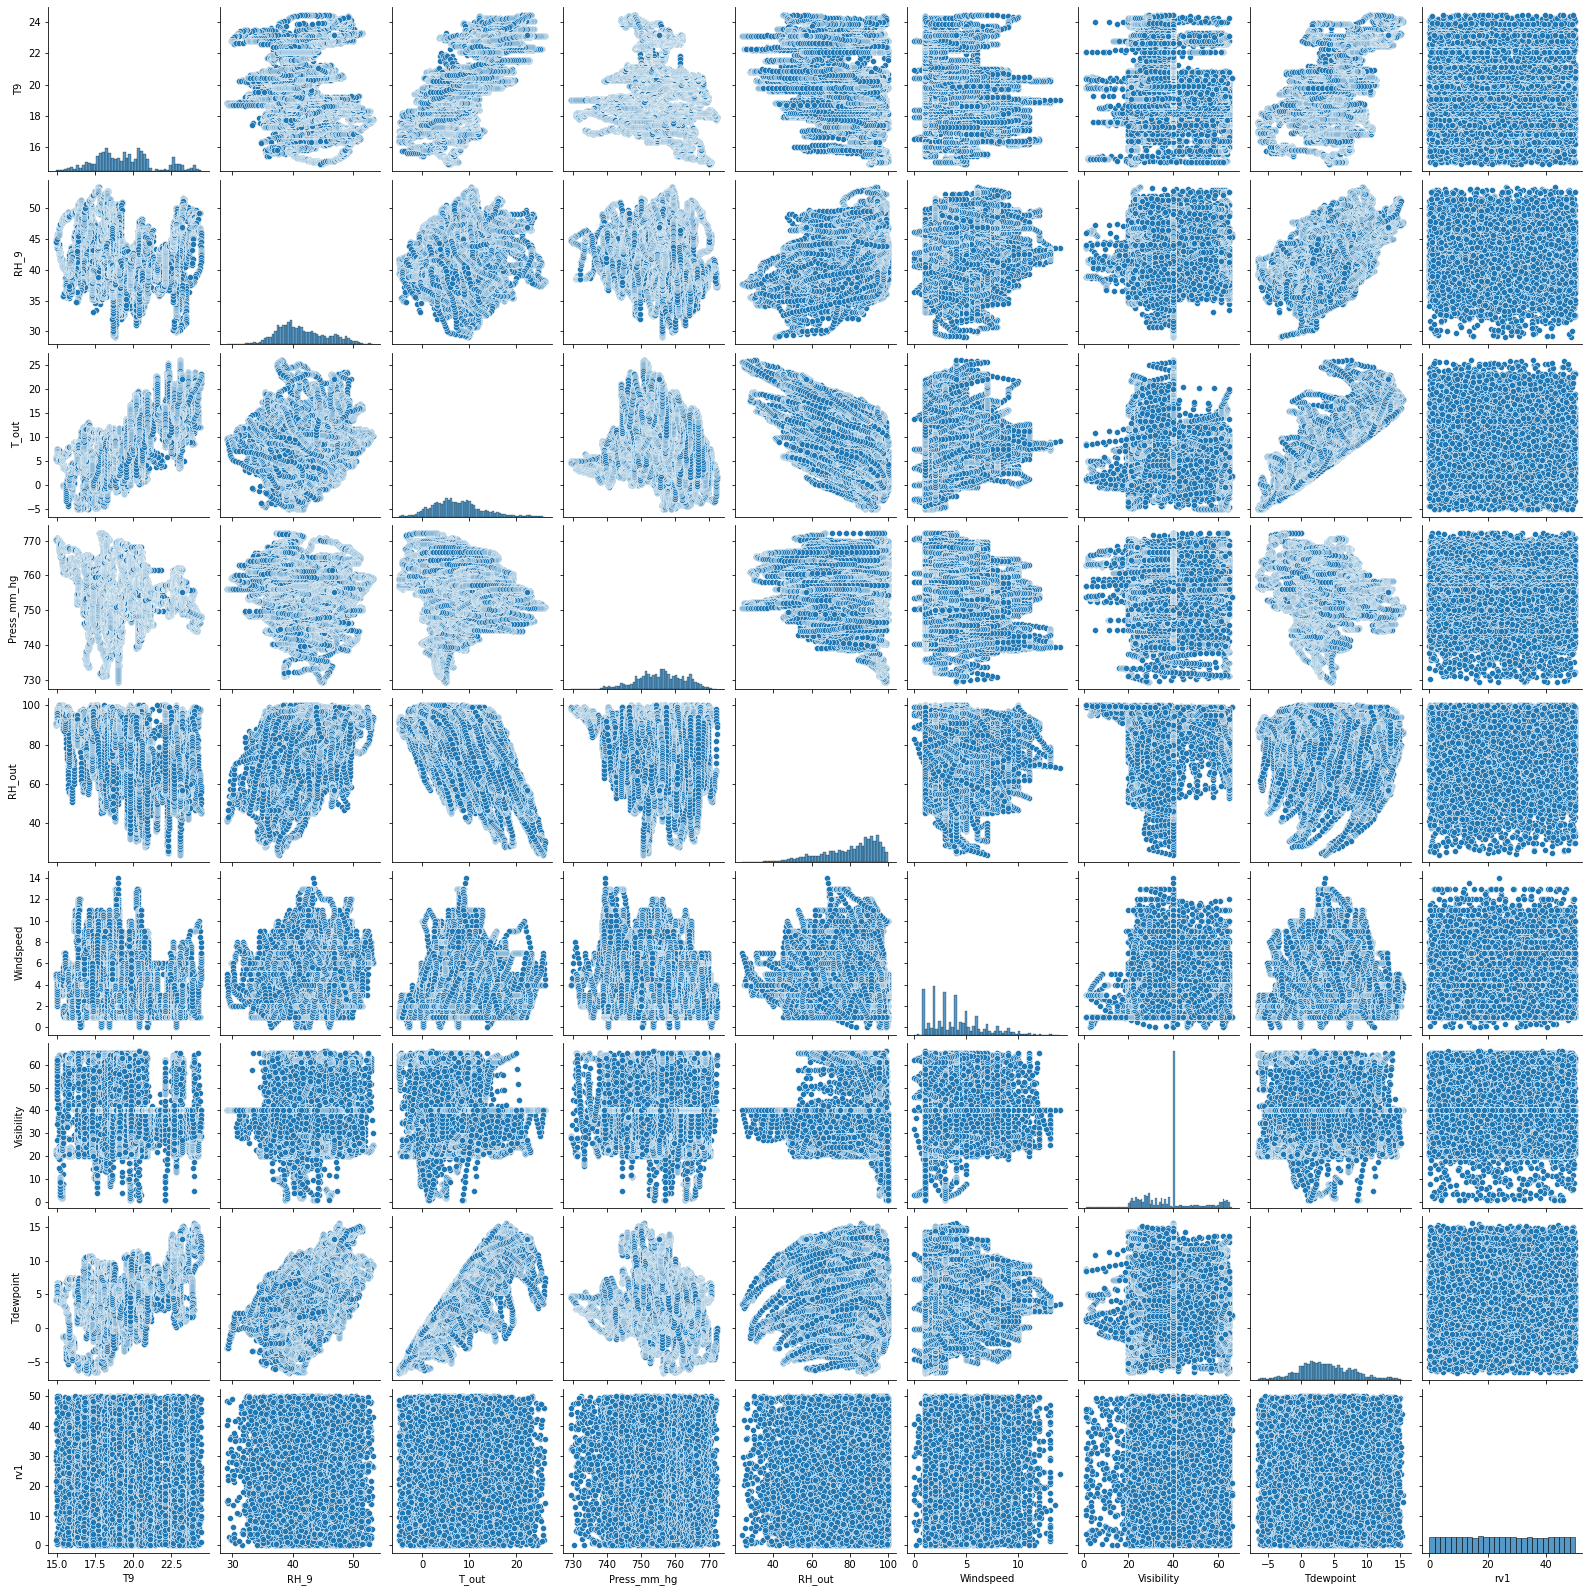

In [205]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=energy_data,vars=['T9',	'RH_9',	'T_out',	'Press_mm_hg',	'RH_out',	'Windspeed',	'Visibility',	'Tdewpoint',	'rv1'])
plt.show()

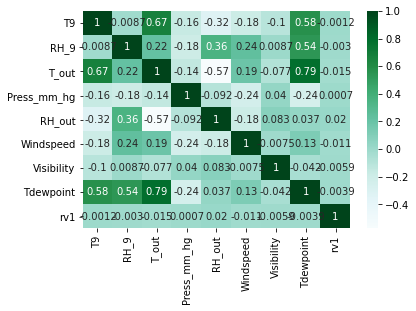

In [206]:
# Checking continuous variables relationship with each other
sns.heatmap(energy_data[['T9',	'RH_9',	'T_out',	'Press_mm_hg',	'RH_out',	'Windspeed',	'Visibility',	'Tdewpoint',	'rv1']].corr(), cmap='BuGn', annot = True)
plt.show()

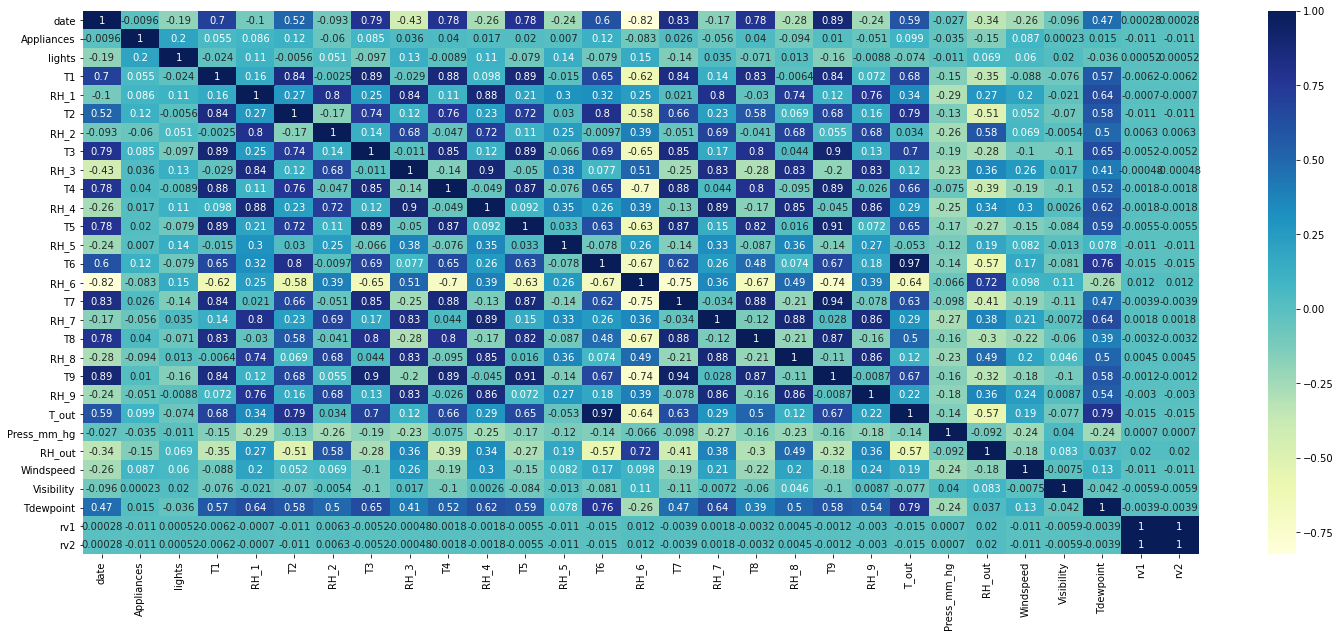

In [207]:
#Calculate Correlation
corr = energy_data.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

In [8]:
# Importing required library
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# PCA Implementation

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
X_std = pca.fit_transform(X_std)

# Multiple Linear Regression using Gradient Boosting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
gbr_params = {'n_estimators': 1000,
          'max_depth': 100,
          'min_samples_split': 100,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = GradientBoostingRegressor(**gbr_params)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Model Accuracy: %.3f" % reg.score(X_test, y_test))
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.396
The mean squared error (MSE) on test set: 0.5751


In [19]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

0.39333114746682046
0.5750711926025829
0.758334485964197
0.39598130417255906


## Repeat with the original data without dimensionality reduction

In [24]:
X_otrain, X_otest, y_otrain, y_otest = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_otrain = pd.DataFrame(X_otrain)
X_otrain.columns = ['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2']
y_otrain = pd.DataFrame(y_otrain)
y_otrain.columns = ['Appliances']

In [27]:
reg = GradientBoostingRegressor(**gbr_params)
reg.fit(X_otrain, y_otrain)
y_opred = reg.predict(X_otest)

print("Model Accuracy: %.3f" % reg.score(X_otest, y_otest))
mse = mean_squared_error(y_otest, reg.predict(X_otest))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.549
The mean squared error (MSE) on test set: 4508.5442


In [28]:
#Cut down number of features to 12 using automated approach
rfe = RFE(reg, step = 12)
rfe.fit(X_otrain,y_otrain)

RFE(estimator=GradientBoostingRegressor(learning_rate=0.01, max_depth=100,
                                        min_samples_split=100,
                                        n_estimators=1000),
    step=12)

In [29]:
#Columns selected by RFE and their weights
list(zip(X_otrain.columns,rfe.support_,rfe.ranking_))

[('date', True, 1),
 ('lights', False, 2),
 ('T1', False, 3),
 ('RH_1', True, 1),
 ('T2', True, 1),
 ('RH_2', True, 1),
 ('T3', True, 1),
 ('RH_3', True, 1),
 ('T4', False, 3),
 ('RH_4', False, 2),
 ('T5', True, 1),
 ('RH_5', True, 1),
 ('T6', False, 3),
 ('RH_6', True, 1),
 ('T7', False, 3),
 ('RH_7', True, 1),
 ('T8', True, 1),
 ('RH_8', True, 1),
 ('T9', False, 3),
 ('RH_9', False, 3),
 ('T_out', False, 3),
 ('Press_mm_hg', True, 1),
 ('RH_out', True, 1),
 ('Windspeed', False, 3),
 ('Visibility', False, 3),
 ('Tdewpoint', False, 3),
 ('rv1', False, 3),
 ('rv2', False, 3)]

In [31]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_otrain.columns[rfe.support_]

Index(['date', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T5', 'RH_5', 'RH_6',
       'RH_7', 'T8', 'RH_8', 'Press_mm_hg', 'RH_out'],
      dtype='object')

In [32]:
# Features not selected by RFE
X_otrain.columns[~rfe.support_]

Index(['lights', 'T1', 'T4', 'RH_4', 'T6', 'T7', 'T9', 'RH_9', 'T_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## Model Evaluation 


In [37]:
y_opred = rfe.predict(X_otest)

print(metrics.mean_absolute_error(y_otest, y_opred))
print(metrics.mean_squared_error(y_otest, y_opred))
print(np.sqrt(metrics.mean_squared_error(y_otest, y_opred)))
print(metrics.r2_score(y_otest, y_opred))

30.47791757387479
4176.019751857017
64.62213051159036
0.5826939404663968


In [42]:
y_train_pred = rfe.predict(X_otrain)

In [39]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

In [50]:
y_train_pred = y_train_pred.reshape(15788,1)

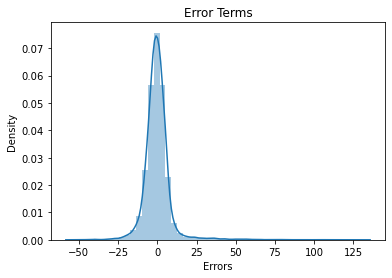

In [51]:
plot_res_dist(y_otrain, y_train_pred)

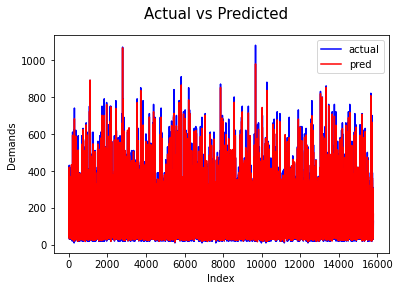

In [60]:
# Actual vs Predicted
c = [i for i in range(0,len(X_otrain),1)]
plt.plot(c,y_otrain, color="blue",label = 'actual')
plt.plot(c,y_train_pred, color="red",label = 'pred')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.legend()
plt.show()

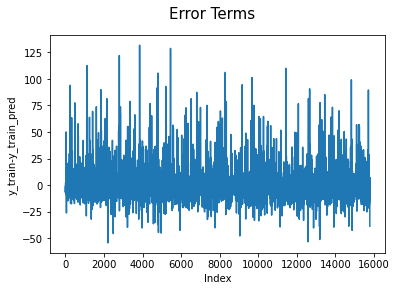

In [53]:
# Error Terms
c = [i for i in range(0,len(X_otrain),1)]
plt.plot(c,y_otrain-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [54]:
#Print R-squared Value
r2_score(y_otrain,y_train_pred)

0.9922107212901428

## Linearity check

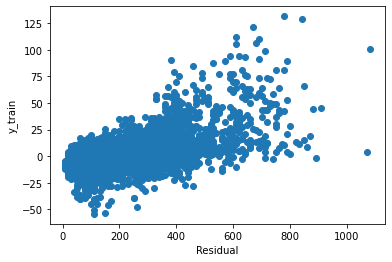

In [55]:
# scatter plot for the check
residual = (y_otrain - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()


In [61]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-",label = 'actual')
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-",label = 'pred')
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)    
    plt.legend()

In [62]:
y_test_pred = rfe.predict(X_otest)

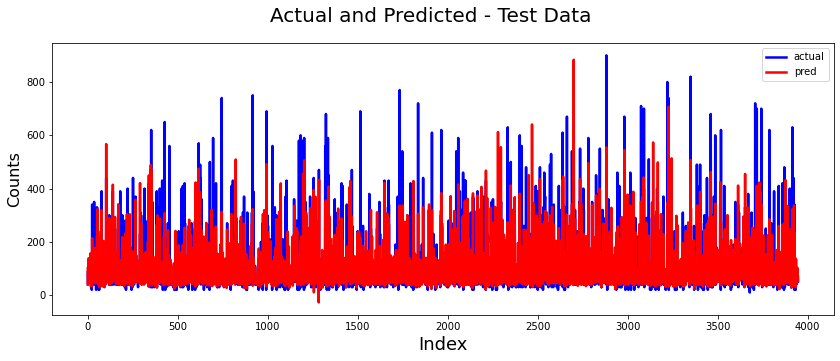

In [63]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_otest,y_test_pred,len(y_test)+1,'Test Data')